In [ ]:
Predicting the Markets with Basic Machine Learning

In [ ]:
You are an AI language model and your task is to rephrase the following text to maintain the original meaning but use different wording:


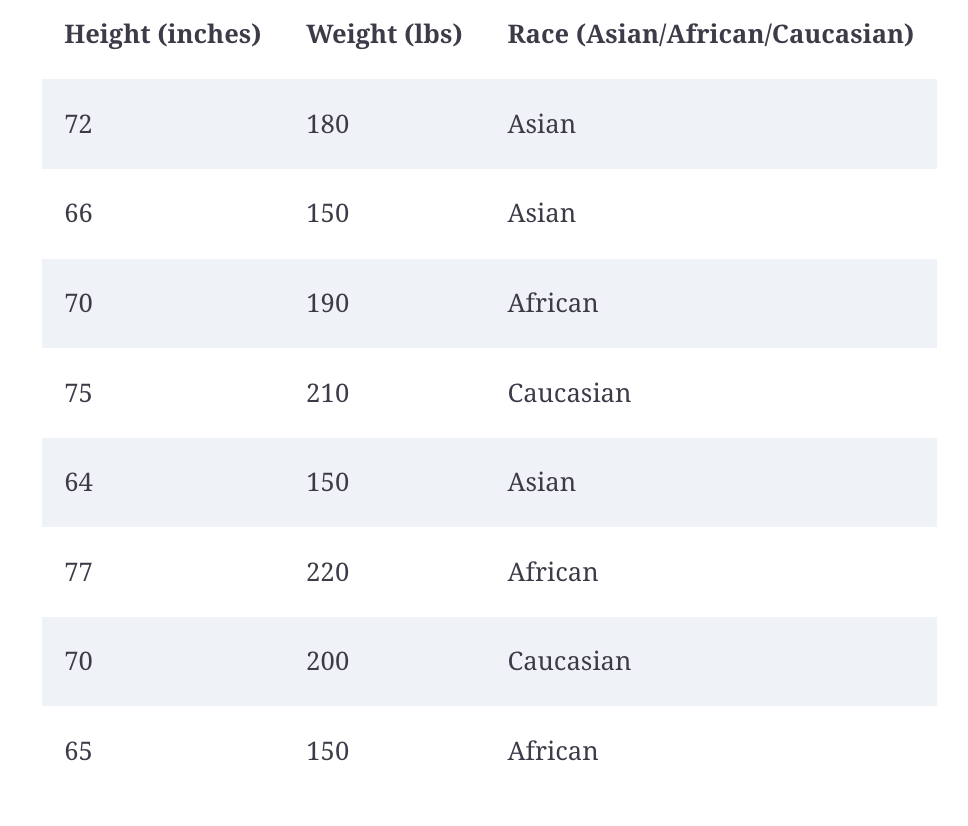

In [1]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.24.47 PM.png")

In [ ]:
import pandas as pd
from pandas_datareader import data

def load_financial_data(start_date, end_date, output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading GOOG data')
    except FileNotFoundError:
        print('File not found...downloading the GOOG data')
        df = data.DataReader('GOOG', 'yahoo', start_date, end_date)
        df.to_pickle(output_file)

    return df


In [ ]:
goog_data = load_financial_data( start_date='2001-01-01', end_date='2018-01-01', output_file='goog_data_large.pkl')

In [ ]:
def create_classification_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

    return (X, Y)

In [ ]:
def create_regression_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = df['Close'].shift(-1) - df['Close']

    return (X, Y)

In [ ]:
from sklearn.model_selection import train_test_split

def create_train_split_group(X, Y, split_ratio=0.8):
    return train_test_split(X, Y, shuffle=False, train_size=split_ratio)


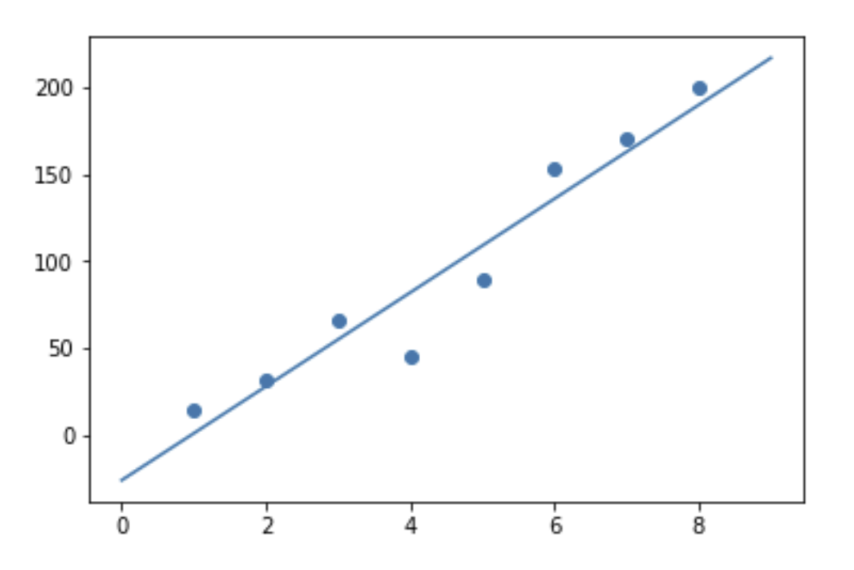

In [2]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.28.35 PM.png")

In [ ]:
goog_data = load_financial_data(
    start_date='2001-01-01',
    end_date='2018-01-01',
    output_file='goog_data_large.pkl')

In [ ]:
goog_data, X, Y = create_regression_trading_condition(goog_data)

In [ ]:
pd.plotting.scatter_matrix(goog_data[['Open-Close', 'High-Low', 'Target']], grid=True, diagonal='kde')

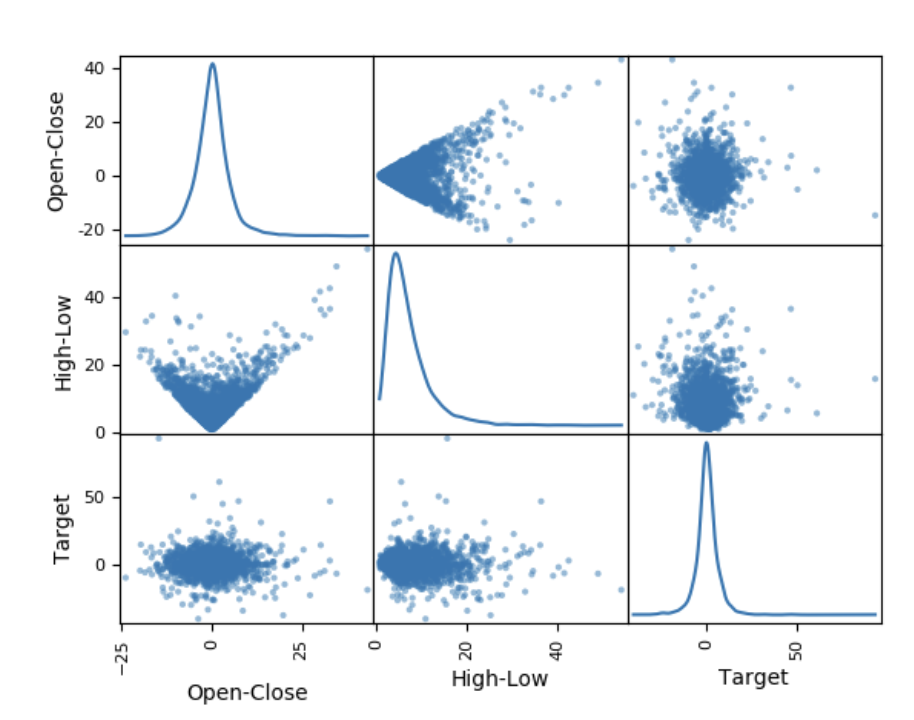

In [3]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.29.00 PM.png")

In [ ]:
X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)

In [ ]:
print('Coefficients: \n', ols.coef_)

In [ ]:
Coefficients:
[[ 0.02406874 -0.05747032]]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, ols.predict(X_train)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, ols.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, ols.predict(X_test)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, ols.predict(X_test)))

In [ ]:
Mean squared error: 27.36
Variance score: 0.00
Mean squared error: 103.50
Variance score: -0.01

In [ ]:
goog_data['Predicted_Signal'] = ols.predict(X)
goog_data['GOOG_Returns'] = np.log(goog_data['Close'] / goog_data['Close'].shift(1))

def calculate_return(df, split_value, symbol):
    cum_goog_return = df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns'] = df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_goog_return

def calculate_strategy_return(df, split_value, symbol):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

cum_goog_return = calculate_return(goog_data, split_value=len(X_train), symbol='GOOG')
cum_strategy_return = calculate_strategy_return(goog_data, split_value=len(X_train), symbol='GOOG')

def plot_chart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()

plot_chart(cum_goog_return, cum_strategy_return, symbol='GOOG')

def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std = strategy_returns.std()
    sharpe = (strategy_returns - symbol_returns) / strategy_std
    return sharpe.mean()

print(sharpe_ratio(cum_strategy_return, cum_goog_return))

In [ ]:
2.083840359081768

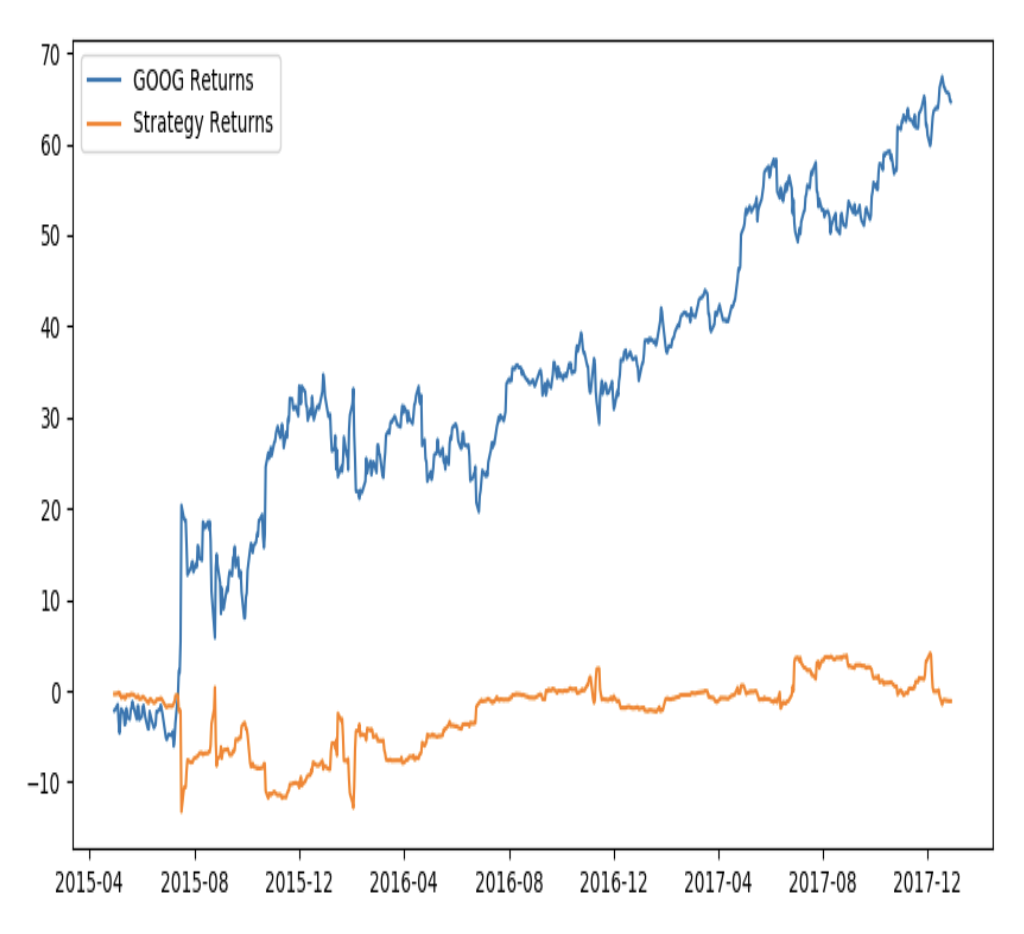

In [4]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.30.46 PM.png")

In [ ]:
from sklearn import linear_model

# Fit the model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', lasso.coef_)

In [ ]:
Coefficients:
[ 0.01673918 -0.04803374]

In [ ]:
from sklearn import linear_model

# Fit the model
ridge = linear_model.Ridge(alpha=10000)
ridge.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', ridge.coef_)


In [ ]:
Coefficients:
[[ 0.01789719 -0.04351513]]

In [ ]:
goog_data=load_financial_data(start_date='2001-01-01',
                   end_date = '2018-01-01',
                   output_file='goog_data_large.pkl')

In [ ]:
X,Y=create_trading_condition(goog_data)

In [ ]:
X_train,X_test,Y_train,Y_test=\
   create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))


In [ ]:
goog_data['Predicted_Signal']=knn.predict(X)

In [ ]:
goog_data['GOOG_Returns']=np.log(goog_data['Close']/
                                goog_data['Close'].shift(1))

cum_goog_return=calculate_return(goog_data,split_value=len(X_train),symbol='GOOG')
cum_strategy_return= calculate_strategy_return(goog_data,split_value=len(X_train))

plot_chart(cum_goog_return, cum_strategy_return,symbol='GOOG')

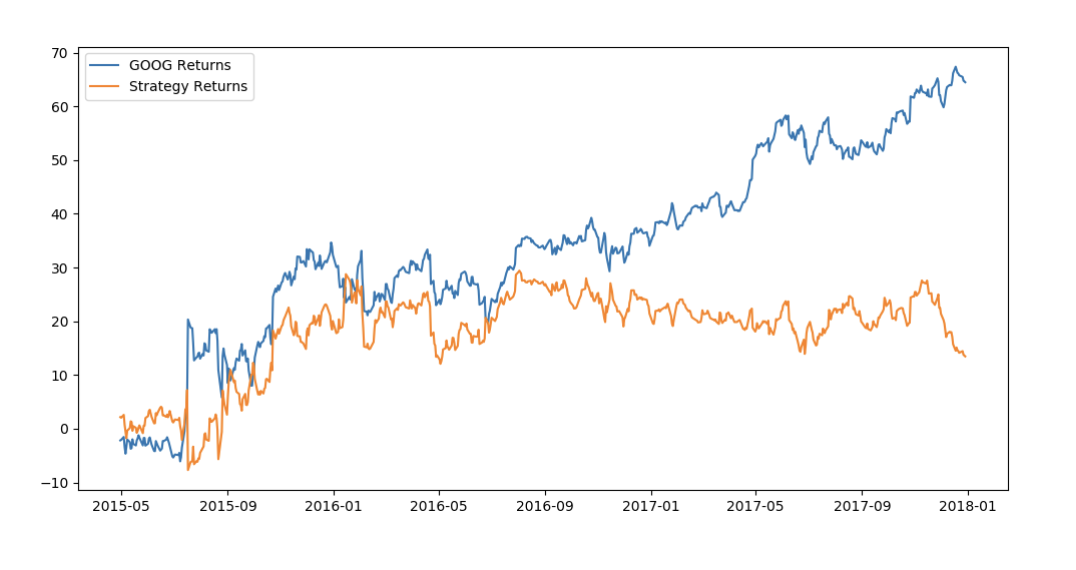

In [5]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.34.20 PM.png")

In [ ]:
# Fit the model
svc=SVC()
svc.fit(X_train, Y_train)

# Forecast value
goog_data['Predicted_Signal']=svc.predict(X)
goog_data['GOOG_Returns']=np.log(goog_data['Close']/
                                goog_data['Close'].shift(1))

cum_goog_return=calculate_return(goog_data,split_value=len(X_train),symbol='GOOG')
cum_strategy_return= calculate_strategy_return(goog_data,split_value=len(X_train))

plot_chart(cum_goog_return, cum_strategy_return,symbol='GOOG')

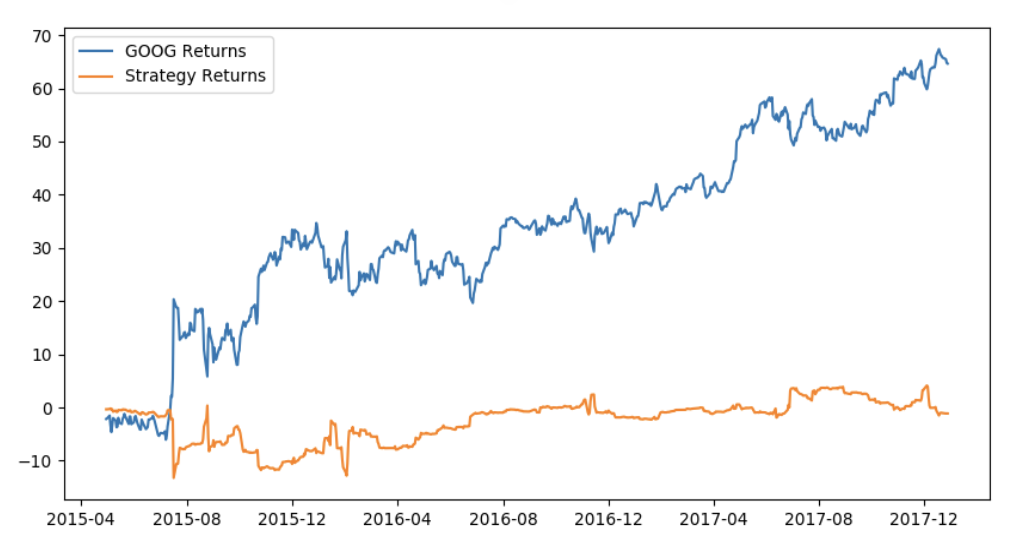

In [6]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.34.41 PM.png")

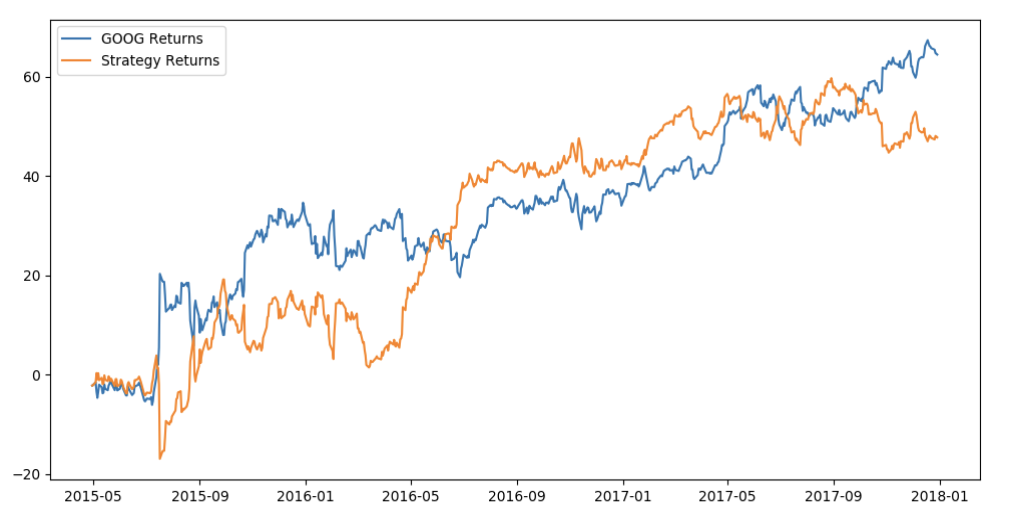

In [7]:
from IPython.display import Image
Image(filename="Screenshot 2023-07-24 at 9.34.50 PM.png")